# Foreign Interest Rate shock - Further comments

**Table of contents**<a id='toc0_'></a>    
- 1. [Setup](#toc1_)    
- 2. [Find IRF](#toc2_)    
- 3. [Figures](#toc3_)    
  - 3.1. [Sensitivity analysis wrt share of HtM households](#toc3_1_)    
    - 3.1.1. [Effect on bequest and savings](#toc3_1_1_)    
    - 3.1.2. [Effect on consumption](#toc3_1_2_)    

<!-- vscode-jupyter-toc-config
	numbering=true
	anchor=true
	flat=false
	minLevel=2
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

In [1]:
%load_ext autoreload
%autoreload 2

import time
import pickle
import numpy as np
from scipy import optimize

import matplotlib.pyplot as plt   
plt.rcParams.update({"axes.grid":True,"grid.color":"black","grid.alpha":"0.25","grid.linestyle":"--"})
prop_cycle = plt.rcParams['axes.prop_cycle']
colors = prop_cycle.by_key()['color']

from BabyMAKROModel import BabyMAKROModelClass

## 1. <a id='toc1_'></a>[Setup](#toc0_)

In [2]:
model = BabyMAKROModelClass(name='baseline') 

**Unpack namespaces:**

In [3]:
par = model.par                
ss = model.ss                  
sol = model.sol                

**Define sensitivity parameter and values:**

In [4]:
parameter = 'Lambda'                                                     # set parameter 
parvalues = [0.,0.25,0.5]                                                # set parameter values
models = model.multi_model(parameter,parvalues)                          # create one model for each value

model compiled, 1.0 mins 17 secs
Jacobian calculated in 4.9 secs
model compiled, 0.1 secs
Jacobian calculated in 4.8 secs
model compiled, 0.1 secs
Jacobian calculated in 4.9 secs


## 2. <a id='toc2_'></a>[Find IRF](#toc0_)

**Define shock:**

In [5]:
Tshock = 50                                                     # length of shock
persistence = np.array([0.80**np.arange(Tshock)])               # persistence of shock       
persistence = persistence.reshape((Tshock,1)) 

**Find IRF:**

In [6]:
for model_ in models:

    model_.set_exo_ss()                                                                       
    model_.set_unknowns_ss()                                                                  
    model_.sol.r_hh[:Tshock,:] = model_.ss.r_hh*(1 + 0.01*persistence)        # shock to foreign interest rate
    model_.find_IRF()                                                   

initial:
t1-t0 = 0.06682 secs
it = 2
    max. abs. error = 7.75e-12
    7.75e-12 in A_R_ini_error
    2.72e-12 in Aq_diff
    5.77e-15 in FOC_capital_agency
    3.69e-12 in FOC_K_ell
    3.95e-12 in mkt_clearing
    1.39e-12 in PC

solve: t1-t0 = 0.12587 secs
evaluate + update: t3-t2 = 0.09526 secs
initial:
t1-t0 = 0.06508 secs
it = 2
    max. abs. error = 5.74e-12
    5.74e-12 in A_R_ini_error
    1.50e-12 in Aq_diff
    4.44e-15 in FOC_capital_agency
    3.20e-12 in FOC_K_ell
    3.17e-12 in mkt_clearing
    1.02e-12 in PC

solve: t1-t0 = 0.12137 secs
evaluate + update: t3-t2 = 0.10104 secs
initial:
t1-t0 = 0.06273 secs
it = 2
    max. abs. error = 3.99e-12
    3.99e-12 in A_R_ini_error
    6.73e-13 in Aq_diff
    2.44e-15 in FOC_capital_agency
    2.04e-12 in FOC_K_ell
    2.97e-12 in mkt_clearing
    6.22e-13 in PC

solve: t1-t0 = 0.12292 secs
evaluate + update: t3-t2 = 0.11089 secs


## 3. <a id='toc3_'></a>[Figures](#toc0_)

### 3.1. <a id='toc3_1_'></a>[Sensitivity analysis wrt share of HtM households](#toc0_)

#### 3.1.1. <a id='toc3_1_1_'></a>[Effect on bequest and savings](#toc0_)

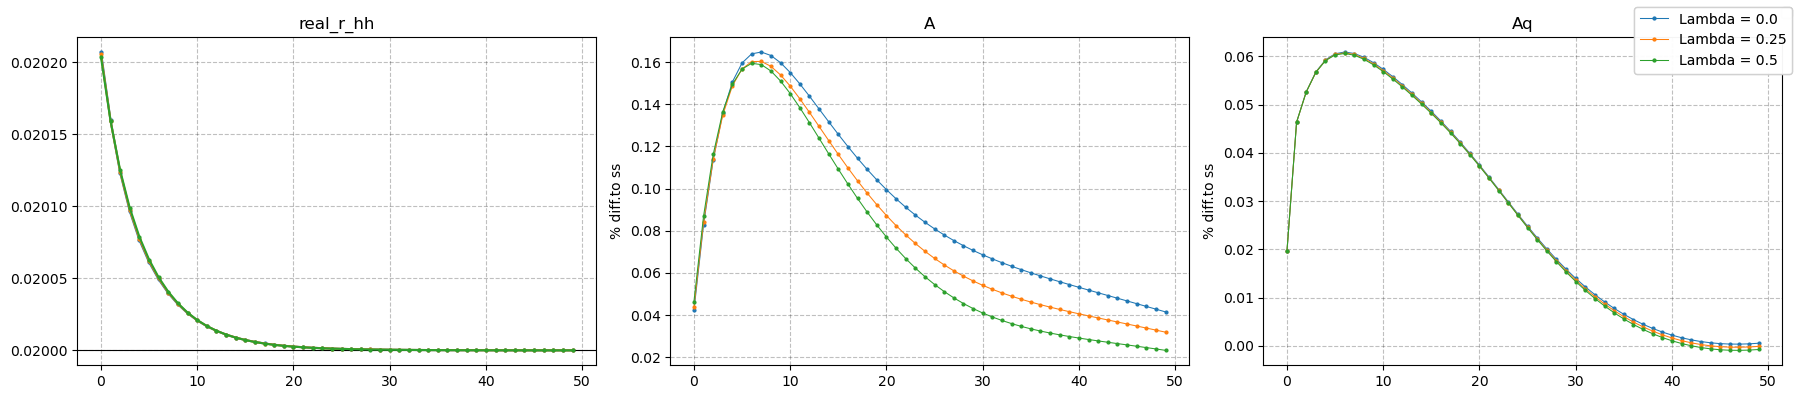

In [7]:
model.plot_IRF_models(models,parameter,varlist=['real_r_hh','A','Aq'],ncol=3,abs=['real_r_hh'])

#### 3.1.2. <a id='toc3_1_2_'></a>[Effect on consumption](#toc0_)

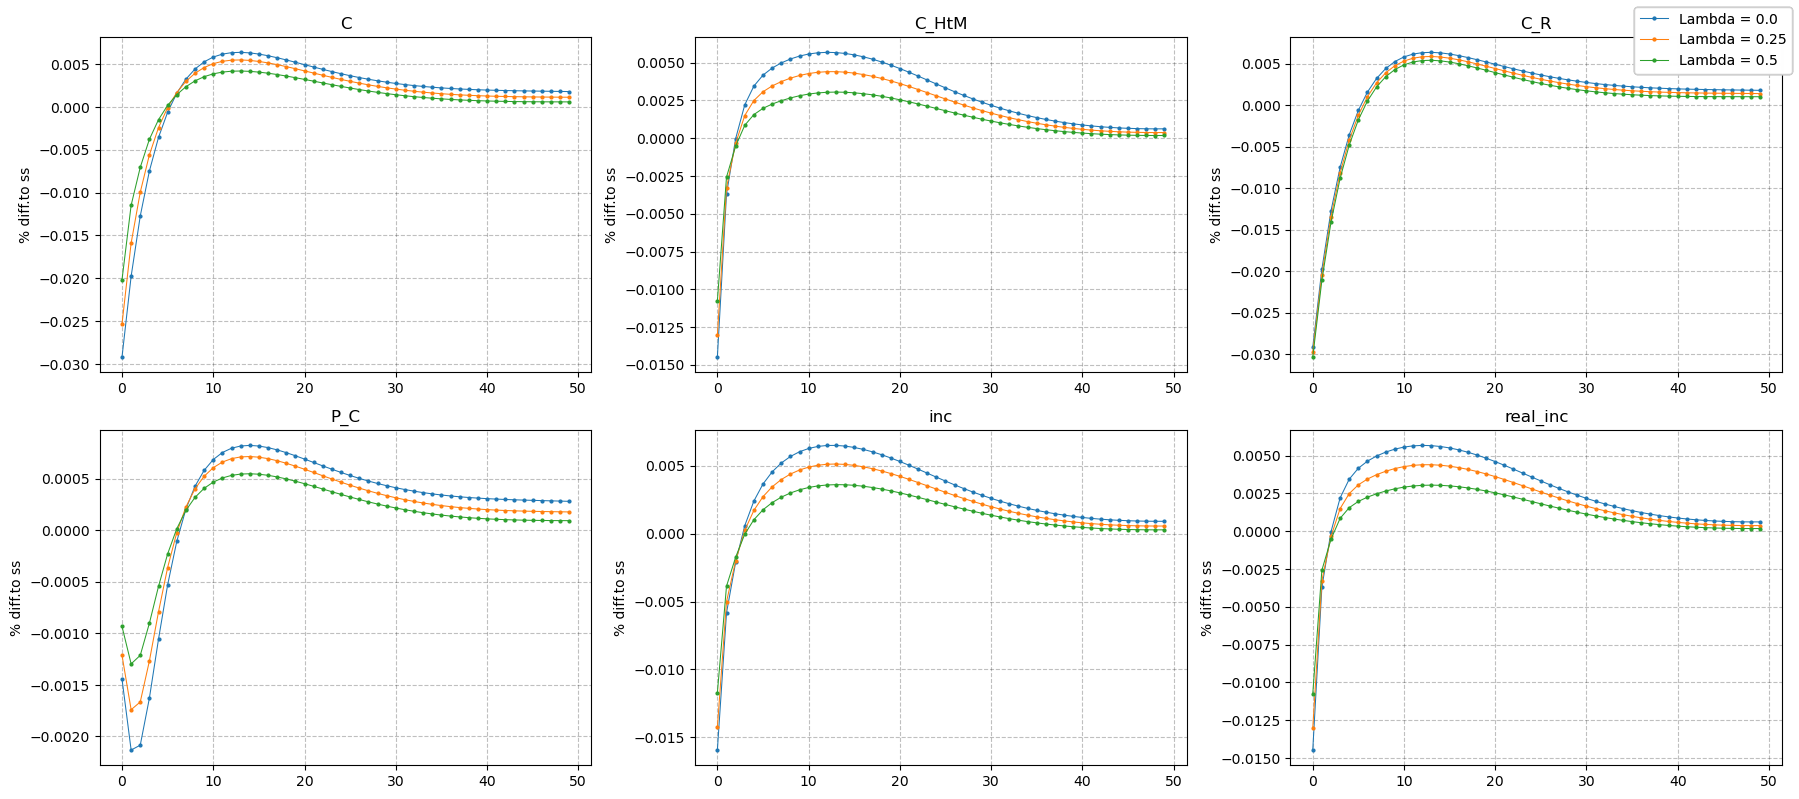

In [8]:
model.plot_IRF_models(models,parameter,varlist=['C','C_HtM','C_R','P_C','inc','real_inc'],ncol=3)